In [0]:
import numpy as np 
import pandas as pd 

In [0]:
from matplotlib import pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
df_titanic = pd.read_csv("https://raw.githubusercontent.com/datascienceschool/docker_rpython/master/data/titanic.csv")
df_titanic.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [0]:
df_titanic.shape

(891, 12)

In [0]:
df_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [0]:
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [0]:
df_titanic.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Emanuel, Miss. Virginia Ethel",male,NaN,NaN,NaN,CA. 2343,NaN,C23 C25 C27,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [0]:
df_titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [0]:
df_titanic.describe(include='O')

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Emanuel, Miss. Virginia Ethel",male,CA. 2343,C23 C25 C27,S
freq,1,577,7,4,644


생존율과 객실등급 간의 상관관계를 분석해보세요.

In [0]:
df_titanic[['Survived', 'Pclass']].corr()

,Survived,Pclass
Survived,1.000000,-0.338481
Pclass,-0.338481,1.000000


생존율과 다음 컬럼값들 간의 상관관계를 분석해보세요.  
['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

상관관계 > Table로 표현해보세요.


In [0]:
df_titanic[['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']].corr()[['Survived']]

,Survived
Survived,1.000000
Pclass,-0.338481
Age,-0.077221
SibSp,-0.035322
Parch,0.081629
Fare,0.257307


상관관계 > heatmap으로 표현해보세요.

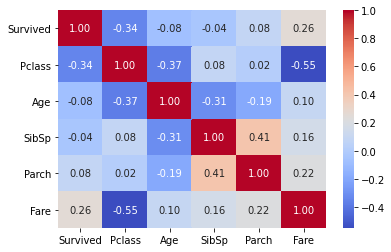

In [0]:
g = sns.heatmap(df_titanic[['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']].corr(),
            cmap='coolwarm', annot=True, fmt='.2f')

각각을 bar plot으로 시각화해보세요.

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


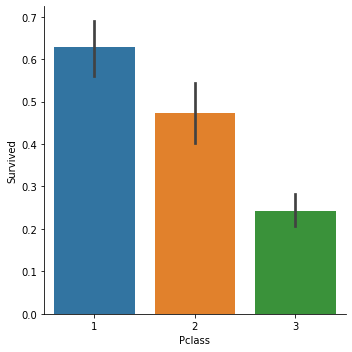

In [0]:
g = sns.factorplot(x='Pclass', y='Survived', data=df_titanic, kind='bar')

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


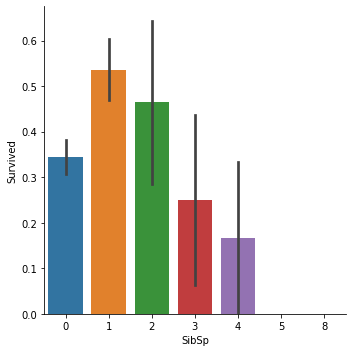

In [0]:
g = sns.factorplot(x='SibSp', y='Survived', data=df_titanic, kind='bar')

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


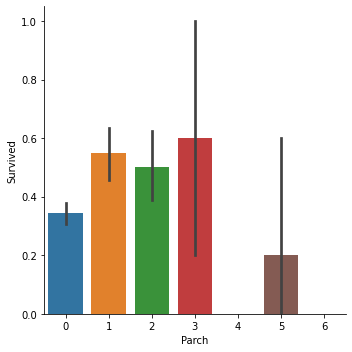

In [0]:
g = sns.factorplot(x='Parch', y='Survived', data=df_titanic, kind='bar')

생존자와 사망자 간의 각 나이 분포도를 히스토그램으로 시각화해보세요.

Survived
0    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
1    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
dtype: object

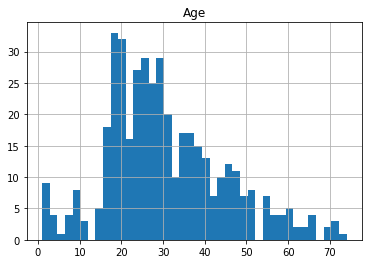

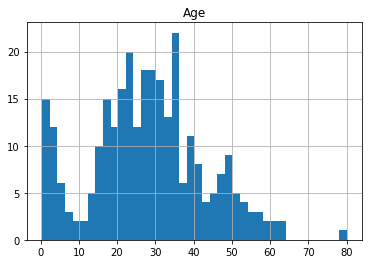

In [0]:
df_titanic[['Survived', 'Age']].groupby(['Survived']).hist(bins=40)

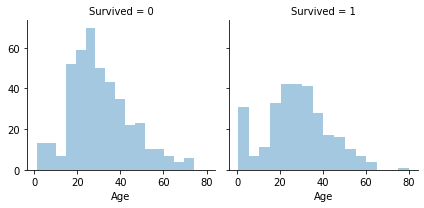

In [0]:
# sns subplot 그리기 (col 기준) (row 기준)
g = sns.FacetGrid(df_titanic, col='Survived')
g = g.map(sns.distplot, 'Age', kde=False) #hist + kde=True + rug=False

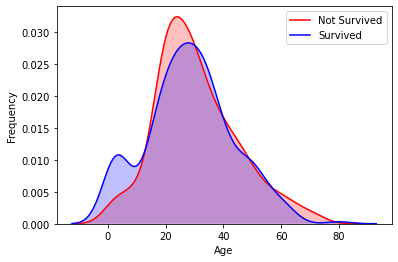

In [0]:
# kde plot
g = sns.kdeplot(df_titanic["Age"][(df_titanic["Survived"] == 0) & (df_titanic["Age"].notnull())], color="Red", shade= True)
g = sns.kdeplot(df_titanic["Age"][(df_titanic["Survived"] == 1) & (df_titanic["Age"].notnull())], ax =g, color="Blue", shade= True)
g.set_xlabel("Age")
g.set_ylabel("Frequency")
g = g.legend(["Not Survived", "Survived"])

성별에 따른 생존율을 비교해보세요.  
남자 : 생존율   
여자 : 생존율

In [0]:
df_titanic[['Survived', 'Sex']].groupby('Sex').mean()

,Survived
Sex,
female,0.742038
male,0.188908


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


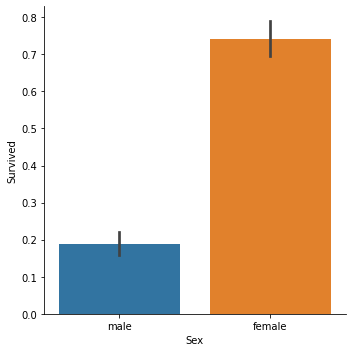

In [0]:
sns.factorplot(x='Sex', y='Survived', data=df_titanic, kind='bar')

객실등급에 따른 생존율을 비교해보세요.  
1등급 : 생존율  
2등급 : 생존율  
3등급 : 생존율

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


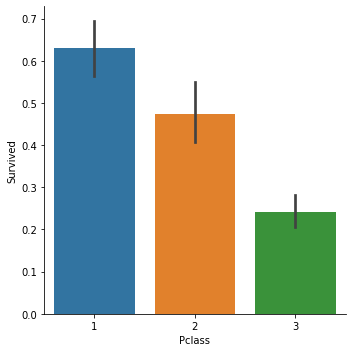

In [0]:
sns.factorplot(x='Pclass', y='Survived', data=df_titanic, kind='bar')

하나의 그래프에 객실등급과 성별에 대한 생존율을 함께 시각화해보세요.

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


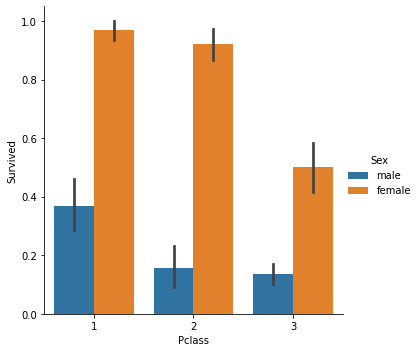

In [0]:
g = sns.factorplot(x='Pclass', y='Survived', hue='Sex', data=df_titanic, kind='bar')

성별에 따른 나이의 분포를 분석해보세요.  
객실등급에 따른 나이의 분포를 분석해보세요.

In [0]:
df_titanic[['Age', 'Sex']].groupby(['Sex']).mean()

,Age
Sex,
female,27.915709
male,30.726645


In [0]:
df_titanic[['Age', 'Pclass']].groupby(['Pclass']).mean()

,Age
Pclass,
1,38.233441
2,29.877630
3,25.140620


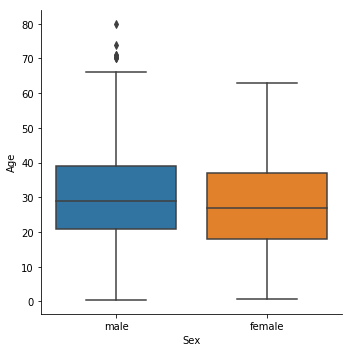

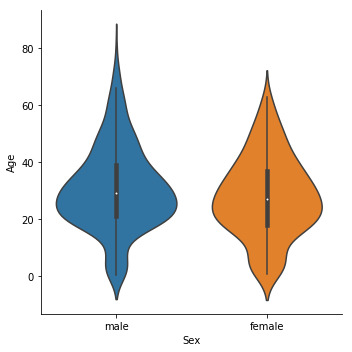

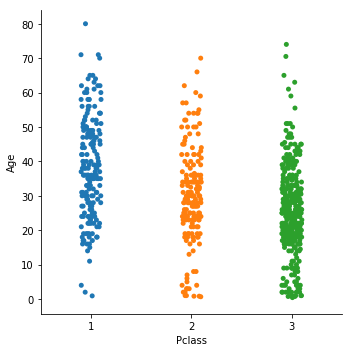

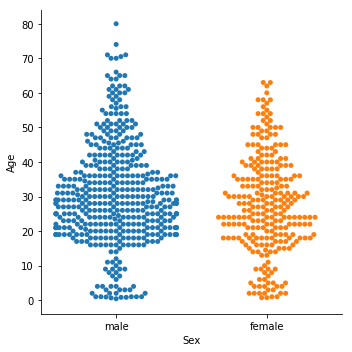

In [0]:
sns.factorplot(x='Sex', y='Age', data=df_titanic, kind='box')
sns.factorplot(x='Sex', y='Age', data=df_titanic, kind='violin')
sns.factorplot(x='Pclass', y='Age', data=df_titanic, kind='strip')
sns.factorplot(x='Pclass', y='Age', data=df_titanic, kind='swarm')

항구에 따른 생존율을 시각화해보세요.

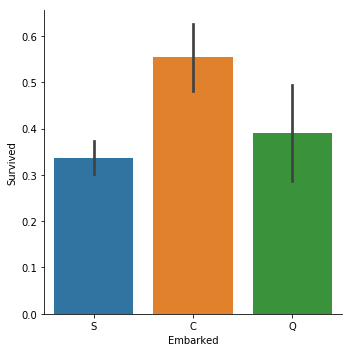

In [0]:
sns.factorplot(x='Embarked', y='Survived', data=df_titanic, kind='bar')

항구에 따라 생존율의 차이가 있습니다.  
왜일까?  
항구에 따라 탑승하는 객실등급 수준의 차이가 있는건 아닐까.. Hoxi..?  
  


In [0]:
df_titanic[['Pclass', 'Embarked']].groupby(['Embarked']).mean()


,Pclass
Embarked,
C,1.886905
Q,2.909091
S,2.350932


In [0]:
count_em_pc = df_titanic[['Pclass', 'Embarked', 'PassengerId']].groupby(['Embarked', 'Pclass']).count()
count_em_pc

PassengerId
Embarked Pclass             
C        1                85
         2                17
         3                66
Q        1                 2
         2                 3
         3                72
S        1               127
         2               164
         3               353

  count plot을 이용해서 표현해보자.

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3672: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


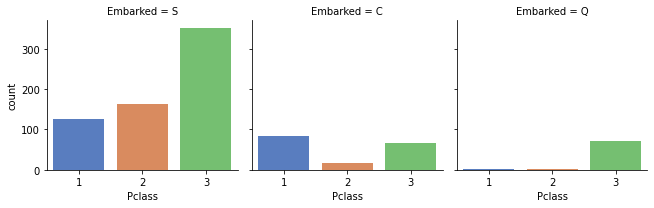

In [0]:
sns.factorplot("Pclass", col="Embarked",  data=df_titanic,
                   size=3, kind="count", palette="muted")

항구와 객실등급에 따른 생존율

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3672: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


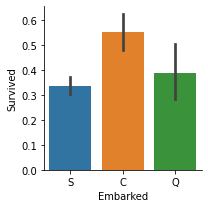

In [0]:
g = sns.factorplot(x='Embarked', y='Survived', data=df_titanic, kind='bar',
                   size=3, aspect=1)

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


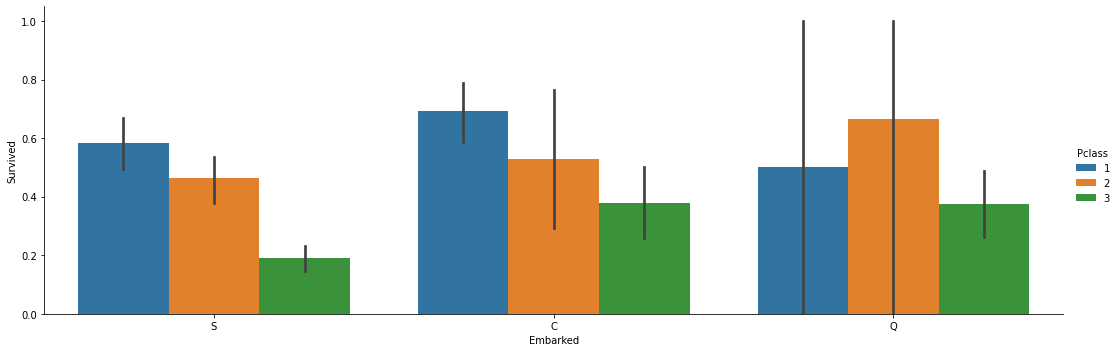

In [0]:
g = sns.factorplot(x='Embarked', y='Survived', hue='Pclass', data=df_titanic, kind='bar',
                   aspect=3)

요금의 분포를 시각화해보세요.

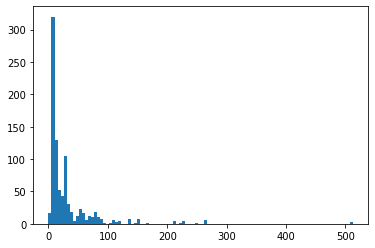

In [0]:
plt.hist(df_titanic["Fare"], bins=100)
plt.show()

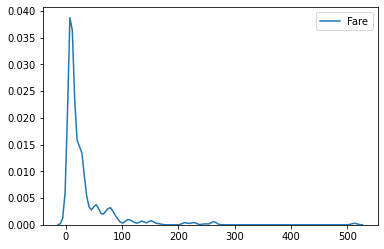

In [0]:
g = sns.kdeplot(df_titanic["Fare"])

In [0]:
df_titanic["Fare"].skew()

4.787316519674893

skewness는 -2 이하, 2 이상이 기준

치우침(Skewness)가 가장 심한 feature가 무엇인지 찾아보세요.

In [0]:
skew = df_titanic.skew().sort_values(ascending=False).drop(['PassengerId'])

In [0]:
df_skew = pd.DataFrame(skew,
                       columns=['skew'])
df_skew

,skew
Fare,4.787317
SibSp,3.695352
Parch,2.749117
Survived,0.478523
Age,0.389108
Pclass,-0.630548


In [0]:
df_skew['feature'] = df_skew.index
df_skew

,skew,feature
Fare,4.787317,Fare
SibSp,3.695352,SibSp
Parch,2.749117,Parch
Survived,0.478523,Survived
Age,0.389108,Age
Pclass,-0.630548,Pclass


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


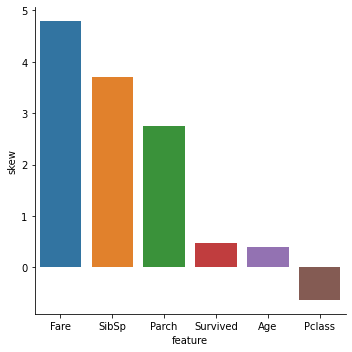

In [0]:
sns.factorplot(x='feature', y='skew', data=df_skew, kind='bar')

첨도(Kurtosis)가 가장 심한 feature가 무엇인지 찾아보세요.

In [0]:
df_titanic.kurt().sort_values(ascending=False)

Fare           33.398141
SibSp          17.880420
Parch           9.778125
Age             0.178274
PassengerId    -1.200000
Pclass         -1.280015
Survived       -1.775005
dtype: float64

In [0]:
df_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [0]:
df_titanic[['Name', 'Ticket', 'Cabin']].describe()

,Name,Ticket,Cabin
count,891,891,204
unique,891,681,147
top,"Emanuel, Miss. Virginia Ethel",CA. 2343,C23 C25 C27
freq,1,7,4


Name, Ticket, Cabin은 모두 unique값이 많기 때문에, 데이터 자체값으로는 큰의미가 없다. 데이터를 직접 살펴보고, 유의미한 value를 추출할 수 있을지 고민해야한다.

In [0]:
df_titanic['Name']

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

In [0]:
df_titanic.Name

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

In [0]:
df_titanic['Title'] = df_titanic.Name.str.extract('([A-Za-z]+)\.', expand=True)

In [0]:
df_titanic['Title'] = df_titanic.Name.str.extract('\s(.+?)\.', expand=True)

In [0]:
pd.crosstab(df_titanic['Title'], df_titanic['Sex'])

In [0]:
df_titanic['Name'].str.split(',')

0                             [Braund,  Mr. Owen Harris]
1      [Cumings,  Mrs. John Bradley (Florence Briggs ...
2                              [Heikkinen,  Miss. Laina]
3        [Futrelle,  Mrs. Jacques Heath (Lily May Peel)]
4                            [Allen,  Mr. William Henry]
                             ...                        
886                             [Montvila,  Rev. Juozas]
887                      [Graham,  Miss. Margaret Edith]
888          [Johnston,  Miss. Catherine Helen "Carrie"]
889                             [Behr,  Mr. Karl Howell]
890                               [Dooley,  Mr. Patrick]
Name: Name, Length: 891, dtype: object

이름에서 Mr, Miss 등 성별 혹은 직위를 나타내는 칭호가 있다. 이것은 생존율에 쓸만하지 않을까?  
  
  이녀석만 따로 빼내자.

In [0]:
[i.split(",")[1] for i in df_titanic["Name"]]

[' Mr. Owen Harris',
 ' Mrs. John Bradley (Florence Briggs Thayer)',
 ' Miss. Laina',
 ' Mrs. Jacques Heath (Lily May Peel)',
 ' Mr. William Henry',
 ' Mr. James',
 ' Mr. Timothy J',
 ' Master. Gosta Leonard',
 ' Mrs. Oscar W (Elisabeth Vilhelmina Berg)',
 ' Mrs. Nicholas (Adele Achem)',
 ' Miss. Marguerite Rut',
 ' Miss. Elizabeth',
 ' Mr. William Henry',
 ' Mr. Anders Johan',
 ' Miss. Hulda Amanda Adolfina',
 ' Mrs. (Mary D Kingcome) ',
 ' Master. Eugene',
 ' Mr. Charles Eugene',
 ' Mrs. Julius (Emelia Maria Vandemoortele)',
 ' Mrs. Fatima',
 ' Mr. Joseph J',
 ' Mr. Lawrence',
 ' Miss. Anna "Annie"',
 ' Mr. William Thompson',
 ' Miss. Torborg Danira',
 ' Mrs. Carl Oscar (Selma Augusta Emilia Johansson)',
 ' Mr. Farred Chehab',
 ' Mr. Charles Alexander',
 ' Miss. Ellen "Nellie"',
 ' Mr. Lalio',
 ' Don. Manuel E',
 ' Mrs. William Augustus (Marie Eugenie)',
 ' Miss. Mary Agatha',
 ' Mr. Edward H',
 ' Mr. Edgar Joseph',
 ' Mr. Alexander Oskar',
 ' Mr. Hanna',
 ' Mr. Ernest Charles',
 ' M

In [0]:
title = [i.split(",")[1].split(".")[0].strip() for i in df_titanic["Name"]]
df_titanic["Title"] = pd.Series(title)
df_titanic["Title"].head()

0      Mr
1     Mrs
2    Miss
3     Mrs
4      Mr
Name: Title, dtype: object

Title에 따른 생존율을 비교해보세요.

In [0]:
df_titanic[['Survived', 'Title']].groupby(['Title']).count()

,Survived
Title,
Capt,1
Col,2
Don,1
Dr,7
Jonkheer,1
Lady,1
Major,2
Master,40
Miss,182


너무 빈도가 적은 Title은 묶어도 되지 않을까?

Mr -> 1   
Miss -> 2  
Mrs -> 3  
Master, Dr -> 4  
Rev -> 5  
others -> 0

In [0]:
set([i.split(",")[1].split(".")[0] for i in df_titanic["Name"]])

{' Capt',
 ' Col',
 ' Don',
 ' Dr',
 ' Jonkheer',
 ' Lady',
 ' Major',
 ' Master',
 ' Miss',
 ' Mlle',
 ' Mme',
 ' Mr',
 ' Mrs',
 ' Ms',
 ' Rev',
 ' Sir',
 ' the Countess'}

In [0]:
[i.split(",")[1].split(".")[0] for i in df_titanic["Name"]]

[' Mr',
 ' Mrs',
 ' Miss',
 ' Mrs',
 ' Mr',
 ' Mr',
 ' Mr',
 ' Master',
 ' Mrs',
 ' Mrs',
 ' Miss',
 ' Miss',
 ' Mr',
 ' Mr',
 ' Miss',
 ' Mrs',
 ' Master',
 ' Mr',
 ' Mrs',
 ' Mrs',
 ' Mr',
 ' Mr',
 ' Miss',
 ' Mr',
 ' Miss',
 ' Mrs',
 ' Mr',
 ' Mr',
 ' Miss',
 ' Mr',
 ' Don',
 ' Mrs',
 ' Miss',
 ' Mr',
 ' Mr',
 ' Mr',
 ' Mr',
 ' Mr',
 ' Miss',
 ' Miss',
 ' Mrs',
 ' Mrs',
 ' Mr',
 ' Miss',
 ' Miss',
 ' Mr',
 ' Mr',
 ' Miss',
 ' Mr',
 ' Mrs',
 ' Master',
 ' Mr',
 ' Mrs',
 ' Mrs',
 ' Mr',
 ' Mr',
 ' Miss',
 ' Mr',
 ' Miss',
 ' Master',
 ' Mr',
 ' Miss',
 ' Mr',
 ' Master',
 ' Mr',
 ' Master',
 ' Mrs',
 ' Mr',
 ' Miss',
 ' Mr',
 ' Mr',
 ' Miss',
 ' Mr',
 ' Mr',
 ' Mr',
 ' Mr',
 ' Mr',
 ' Mr',
 ' Master',
 ' Miss',
 ' Mr',
 ' Mr',
 ' Miss',
 ' Mr',
 ' Miss',
 ' Mrs',
 ' Mr',
 ' Mr',
 ' Miss',
 ' Mr',
 ' Mr',
 ' Mr',
 ' Mr',
 ' Mr',
 ' Mr',
 ' Mr',
 ' Mr',
 ' Mr',
 ' Mrs',
 ' Mr',
 ' Miss',
 ' Mr',
 ' Mr',
 ' Mr',
 ' Mr',
 ' Mr',
 ' Miss',
 ' Mr',
 ' Mr',
 ' Miss',
 ' Mr',
 ' Miss',
 ' Mr'

이와 같이, Ticket과 Cabin도 분석해보세요.

In [0]:
df_titanic['Ticket']

0             A/5 21171
1              PC 17599
2      STON/O2. 3101282
3                113803
4                373450
             ...       
886              211536
887              112053
888          W./C. 6607
889              111369
890              370376
Name: Ticket, Length: 891, dtype: object

In [0]:
df_titanic['Cabin']

0       NaN
1       C85
2       NaN
3      C123
4       NaN
       ... 
886     NaN
887     B42
888     NaN
889    C148
890     NaN
Name: Cabin, Length: 891, dtype: object

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3672: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


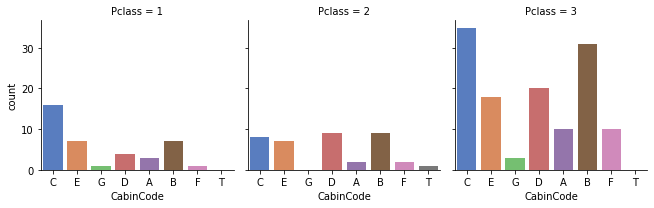

In [0]:
cabin_num = [cabin.split()[0][0] for cabin in df_titanic['Cabin'][df_titanic['Cabin'].notnull()]]
df_titanic["CabinCode"] = pd.Series(cabin_num)
sns.factorplot("CabinCode", col="Pclass",  data=df_titanic,
                   size=3, kind="count", palette="muted")